In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 한글 폰트 설정

In [2]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'  # 사용할 폰트 설정

# 기본적인 폰트 설정(옵션)
plt.rcParams['font.size'] = 12            # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 1. 데이터 불러오기

## 1-1) 인구수 Data 

In [3]:
# 인구수 data - 2023년 6월 30일 기준
pre_popu = pd.read_csv('/Users/bagtaejeong/Desktop/DSL/EDA/관광/데이터/인기관광지/행정안전부_지역별(법정동) 성별 연령별 주민등록 인구수6월(7.11).csv', encoding = 'cp949')
pre_popu = pre_popu.iloc[:,1:9]
pre_popu.head()

,기준연월,시도명,시군구명,읍면동명,리명,계,남자,여자
0,2023-06-30,서울특별시,종로구,청운동,청운동,2343,1166,1177
1,2023-06-30,서울특별시,종로구,신교동,신교동,1347,603,744
2,2023-06-30,서울특별시,종로구,궁정동,궁정동,196,86,110
3,2023-06-30,서울특별시,종로구,효자동,효자동,563,249,314
4,2023-06-30,서울특별시,종로구,창성동,창성동,414,171,243


## 1-2) 인구수 Data 전처리
- popu 만들기(인구수를 '시도명', '시군구명'으로 grouby)

In [4]:
# 시군구명 수정 -> 천안시 동남구, 성남시 수정구 등을 없애기 위해
pre_popu['시군구명'] = pre_popu['시군구명'].str.split(pat = ' ').str[0] 

# 시군구명의 139개 결측치 처리
na_popu = pre_popu.fillna('세종') # 시도명이 세종특별자치시인 경우 시군구명이 비어있었음.
# na_popu.isna().sum()

# 그룹화 : '시도명', '시군구명' 
popu = na_popu.groupby(['시도명', '시군구명']).sum(numeric_only=True).reset_index()
popu

,시도명,시군구명,계,남자,여자
0,강원특별자치도,강릉시,210456,104324,106132
1,강원특별자치도,고성군,27311,14064,13247
2,강원특별자치도,동해시,89058,45253,43805
3,강원특별자치도,삼척시,63270,32093,31177
4,강원특별자치도,속초시,82474,40873,41601
...,...,...,...,...,...
224,충청북도,제천시,131231,65990,65241
225,충청북도,증평군,37349,19472,17877
226,충청북도,진천군,85876,45448,40428
227,충청북도,청주시,850168,429590,420578


## 1-3) 관광 Data

In [5]:
# 인기관광지_외지인 데이터 불러오기
# 강원/경기/충남/충북/경남/경북/전남/전북/서울/세종/대전/대구/울산/인천/광주/부산/제주 <=> 1~17
sido_list = [(1,'강원특별자치도'), (2,'경기도'), (3,'충청남도'), (4,'충청북도'), (5,'경상남도'), (6,'경상북도'), (7,'전라남도'), (8,'전라북도'),(9,'서울특별시'), 
             (10,'세종특별자치시'), (11,'대전광역시'), (12,'대구광역시'), (13,'울산광역시'), (14,'인천광역시'), (15,'광주광역시'), (16,'부산광역시'), (17,'제주특별자치도')]

df1 = pd.read_csv(f'/Users/bagtaejeong/Desktop/DSL/EDA/관광/데이터/인기관광지/[22072306] 강원도 인기관광지/인기관광지_외지인.csv', encoding = 'cp949')
df2 = pd.read_csv(f'/Users/bagtaejeong/Desktop/DSL/EDA/관광/데이터/인기관광지/[22072306] 경기도 인기관광지/인기관광지_외지인.csv', encoding = 'cp949')
df3 = pd.read_csv(f'/Users/bagtaejeong/Desktop/DSL/EDA/관광/데이터/인기관광지/[22072306] 충청남도 인기관광지/인기관광지_외지인.csv', encoding = 'cp949')
df4 = pd.read_csv(f'/Users/bagtaejeong/Desktop/DSL/EDA/관광/데이터/인기관광지/[22072306] 충청북도 인기관광지/인기관광지_외지인.csv', encoding = 'cp949')
df5 = pd.read_csv(f'/Users/bagtaejeong/Desktop/DSL/EDA/관광/데이터/인기관광지/[22072306] 경상남도 인기관광지/인기관광지_외지인.csv', encoding = 'cp949')
df6 = pd.read_csv(f'/Users/bagtaejeong/Desktop/DSL/EDA/관광/데이터/인기관광지/[22072306] 경상북도 인기관광지/인기관광지_외지인.csv', encoding = 'cp949')
df7 = pd.read_csv(f'/Users/bagtaejeong/Desktop/DSL/EDA/관광/데이터/인기관광지/[22072306] 전라남도 인기관광지/인기관광지_외지인.csv', encoding = 'cp949')
df8 = pd.read_csv(f'/Users/bagtaejeong/Desktop/DSL/EDA/관광/데이터/인기관광지/[22072306] 전라북도 인기관광지/인기관광지_외지인.csv', encoding = 'cp949')
df9 = pd.read_csv(f'/Users/bagtaejeong/Desktop/DSL/EDA/관광/데이터/인기관광지/[22072306] 서울 인기관광지/인기관광지_외지인.csv', encoding = 'cp949')
df10 = pd.read_csv(f'/Users/bagtaejeong/Desktop/DSL/EDA/관광/데이터/인기관광지/[22072306] 세종 인기관광지/인기관광지_외지인.csv', encoding = 'cp949')
df11 = pd.read_csv(f'/Users/bagtaejeong/Desktop/DSL/EDA/관광/데이터/인기관광지/[22072306] 대전 인기관광지/인기관광지_외지인.csv', encoding = 'cp949')
df12 = pd.read_csv(f'/Users/bagtaejeong/Desktop/DSL/EDA/관광/데이터/인기관광지/[22072306] 대구 인기관광지/인기관광지_외지인.csv', encoding = 'cp949')
df13 = pd.read_csv(f'/Users/bagtaejeong/Desktop/DSL/EDA/관광/데이터/인기관광지/[22072306] 울산 인기관광지/인기관광지_외지인.csv', encoding = 'cp949')
df14 = pd.read_csv(f'/Users/bagtaejeong/Desktop/DSL/EDA/관광/데이터/인기관광지/[22072306] 인천 인기관광지/인기관광지_외지인.csv', encoding = 'cp949')
df15 = pd.read_csv(f'/Users/bagtaejeong/Desktop/DSL/EDA/관광/데이터/인기관광지/[22072306] 광주 인기관광지/인기관광지_외지인.csv', encoding = 'cp949')
df16 = pd.read_csv(f'/Users/bagtaejeong/Desktop/DSL/EDA/관광/데이터/인기관광지/[22072306] 부산 인기관광지/인기관광지_외지인.csv', encoding = 'cp949')
df17 = pd.read_csv(f'/Users/bagtaejeong/Desktop/DSL/EDA/관광/데이터/인기관광지/[22072306] 제주도 인기관광지/인기관광지_외지인.csv', encoding = 'cp949') 

dflist = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17]

## 1-4) 관광 Data 전처리
- tour_result 만들기(관광데이터 전처리 이후 데이터)

In [6]:
# 관광데이터 concat
result_df = pd.concat(dflist)

# 시도명 column 만들기
result_df['시도명'] = result_df['주소'].str.split(pat=' ', n=2).str[0] 

# 시군구명 column 만들기
result_df['시군구명'] = result_df['주소'].str.split(pat=' ', n=3).str[1]

# 관광지 수 column 만들기
result_df['관광지 수'] = 1
result_df.loc[result_df['시도명'] == '세종시', '시군구명'] = '세종'

# 부적절한 "관광지명" 제거 
# 대형마트, 백화점, 쇼핑몰, 면세점, 레저스포츠시설(야구장), 영화관, 자동차극장 => 관광의 의미와 맞지 않음
# 교통시설의 경우도 도로를 새로 만들어야 하는 것 + 관광의 의미와 맞지 않음.
filter1_result = result_df[~result_df['관광지명'].str.contains('롯데시네마|CGV|메가박스|자동차극장')]

# 부적절한 "분류" 제거
# 개수가 너무 적은 관광지 유형 삭제 -> 농/산/어촌체험(2개)/캠핑(11개)/수상레저스포츠(2개)/기타숙박(1개)/모텔(17개)/펜션/민박(2개)
filter2_result = filter1_result[~filter1_result['분류'].str.contains('교통시설|농/산/어촌체험|캠핑|수상레저스포츠|기타숙박|모텔|펜션/민박|대형마트|백화점|쇼핑몰|면세점|레저스포츠시설')]

# 대분류로 매핑할 조건을 딕셔너리로 정의
large_category_mapping = {
    '복합관광시설':'복합관광지', '웰니스관광':'복합관광지', '데이트코스':'복합관광지', '랜드마크관광':'복합관광지', '기타레저스포츠':'복합관광지', # 복합관광지
    '자연경관(산)':'자연관광지', '자연관광(산)':'자연관광지', '자연생태':'자연관광지', '자연공원':'자연관광지', # 자연관광지
    '역사유적지':'역사유적지', '역사유물': '역사유적지', # 역사유적지
    '전시시설':'전시시설', '공연시설':'전시시설', # 전시시설
    '육상레저스포츠':'골프장(육상레저스포츠)', '자연경관(하천/해양)':'자연경관(하천/해양)', '콘도미니엄':'콘도미니엄', '호텔':'호텔', 
    '시장':'시장', '테마공원':'테마공원', '기타관광':'기타관광', '기타문화관광지': '기타문화관광지',
    '교통시설':'교통시설','도시공원':'도시공원', '종교성지':'종교성지'}

# '분류' 컬럼을 '대분류'로 매핑
tour_result = filter2_result.copy()
tour_result['대분류'] = tour_result.loc[:,'분류'].map(large_category_mapping)

# '주소', '순위' 컬럼 삭제
tour_result = tour_result.loc[:,['시도명', '시군구명', '대분류', '분류', '관광지명', '외지인 검색 수', '관광지 수']]

# 시도명 일치시키기
tour_result['시도명'] = tour_result['시도명'].replace({'강원':'강원특별자치도', '경기':'경기도', '경남':'경상남도', '경북':'경상북도', '광주':'광주광역시', '대구':'대구광역시',
                             '대전':'대전광역시', '부산':'부산광역시', '서울':'서울특별시', '세종시':'세종특별자치시', '울산':'울산광역시', '인천':'인천광역시',
                            '전남':'전라남도', '전북':'전라북도', '제주':'제주특별자치도', '충남':'충청남도', '충북':'충청북도'})


tour_result

,시도명,시군구명,대분류,분류,관광지명,외지인 검색 수,관광지 수
0,강원특별자치도,속초시,시장,시장,속초관광수산시장,811824,1
1,강원특별자치도,삼척시,콘도미니엄,콘도미니엄,쏠비치삼척,613581,1
2,강원특별자치도,홍천군,콘도미니엄,콘도미니엄,소노벨비발디파크,509816,1
3,강원특별자치도,홍천군,콘도미니엄,콘도미니엄,소노펠리체 비발디파크,375248,1
4,강원특별자치도,속초시,호텔,호텔,체스터톤스속초,360474,1
...,...,...,...,...,...,...,...
94,제주특별자치도,제주시,호텔,호텔,에코랜드호텔,15483,1
95,제주특별자치도,제주시,호텔,호텔,라마다제주시티홀호텔,15373,1
96,제주특별자치도,제주시,호텔,호텔,호텔휘슬락,15208,1
98,제주특별자치도,서귀포시,기타관광,기타관광,보롬왓,14789,1


# 2. 분석 전처리

## 2-1) 2개의 데이터프레임 만들기 
- tour_result 활용

#### 1) tour_sigungu : 시도-시군구에 따른 외지인 검색 수와 관광지 수

#### 2) tour_general_category : 시도-시군구에 따른 대분류별 관광지 수
- 관광지 유형을 column에 넣어주는 작업

In [7]:
# 시도-시군구별 외지인 검색 수, 관광지 수 알아보기
tour_sigungu = tour_result.groupby(['시도명','시군구명']).sum(numeric_only = True).reset_index()

# 대분류별 관광지 수 알아보기
tour_general_category = tour_result.groupby(['시도명','시군구명', '대분류']).size().unstack(fill_value = 0).reset_index()

# tour_sigungu 
tour_general_category

대분류,시도명,시군구명,골프장(육상레저스포츠),기타관광,기타문화관광지,도시공원,복합관광지,시장,역사유적지,자연경관(하천/해양),자연관광지,전시시설,종교성지,콘도미니엄,테마공원,호텔
0,강원특별자치도,강릉시,0,0,0,0,2,2,1,5,0,1,0,2,0,3
1,강원특별자치도,고성군,1,0,0,0,1,0,0,2,0,0,0,3,0,0
2,강원특별자치도,동해시,0,0,0,0,0,0,0,2,0,0,0,0,0,0
3,강원특별자치도,삼척시,0,0,0,0,0,0,0,2,0,0,0,1,0,0
4,강원특별자치도,속초시,0,2,0,1,1,1,0,3,0,0,0,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,충청북도,제천시,2,2,0,0,1,1,1,1,0,0,0,3,0,1
179,충청북도,증평군,1,0,0,0,0,0,0,0,0,0,0,0,0,0
180,충청북도,진천군,5,0,0,0,0,0,1,0,0,0,0,0,0,0
181,충청북도,청주시,4,1,0,2,1,2,1,0,0,1,0,0,1,2


## 2-2) 인구 - 관광 데이터 병합

#### general_tour : tour_sigungu - tour_general_category 병합
- tour_general_category에 외지인 검색 수와 관광지 수 병합

#### general_tour_popu : general_tour - popu 병합
- 실질적으로 사용할 데이터!

In [21]:
general_tour = pd.merge(tour_sigungu, tour_general_category, on = ['시도명', '시군구명'])
general_tour_popu = pd.merge(general_tour, popu, on = ['시도명', '시군구명'])

# tour_popu
general_tour_popu

,시도명,시군구명,외지인 검색 수,관광지 수,골프장(육상레저스포츠),기타관광,기타문화관광지,도시공원,복합관광지,시장,...,자연경관(하천/해양),자연관광지,전시시설,종교성지,콘도미니엄,테마공원,호텔,계,남자,여자
0,강원특별자치도,강릉시,1748289,16,0,0,0,0,2,2,...,5,0,1,0,2,0,3,210456,104324,106132
1,강원특별자치도,고성군,499691,7,1,0,0,0,1,0,...,2,0,0,0,3,0,0,27311,14064,13247
2,강원특별자치도,동해시,122524,2,0,0,0,0,0,0,...,2,0,0,0,0,0,0,89058,45253,43805
3,강원특별자치도,삼척시,758197,3,0,0,0,0,0,0,...,2,0,0,0,1,0,0,63270,32093,31177
4,강원특별자치도,속초시,2572437,13,0,2,0,1,1,1,...,3,0,0,0,2,0,3,82474,40873,41601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,충청북도,제천시,515253,12,2,2,0,0,1,1,...,1,0,0,0,3,0,1,131231,65990,65241
179,충청북도,증평군,32306,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,37349,19472,17877
180,충청북도,진천군,223976,6,5,0,0,0,0,0,...,0,0,0,0,0,0,0,85876,45448,40428
181,충청북도,청주시,584236,15,4,1,0,2,1,2,...,0,0,1,0,0,1,2,850168,429590,420578


## 3) 분석

### 분석에 사용할 데이터 소개

#### 1) tour_result : 관광에 적합하지 않은 것을 제외한 관광데이터(1102개)
- 각 행에 관광지에 대한 정보가 담겨있음.

#### 2) general_tour_popu : [시도명, 시군구명으로 그룹] 
- 각 행에 시도(시군구)별 관광지에 대한 정보(관광지 수, 관광지 유형)가 담겨있음.

## 3-1) 상관관계

- 콘도미니엄, 호텔, 복합관광지, 자연경관(하천/해양)의 상관계수가 0.4 이상

In [9]:
# general_tour_popu
general_tour_popu.corr(numeric_only = True)[['외지인 검색 수', '계']].sort_values(by='외지인 검색 수', ascending = False)

,외지인 검색 수,계
외지인 검색 수,1.000000,0.248863
콘도미니엄,0.639609,-0.113533
관광지 수,0.585411,0.165649
호텔,0.519267,0.254320
복합관광지,0.451071,0.036413
자연경관(하천/해양),0.427394,-0.085769
테마공원,0.302034,0.161260
자연관광지,0.300479,0.002259
전시시설,0.295686,0.287414
시장,0.294155,0.305114


## 3-2) 관광유형 분석
### BoxPlot

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import researchpy as rp
import pingouin as pg
import statsmodels

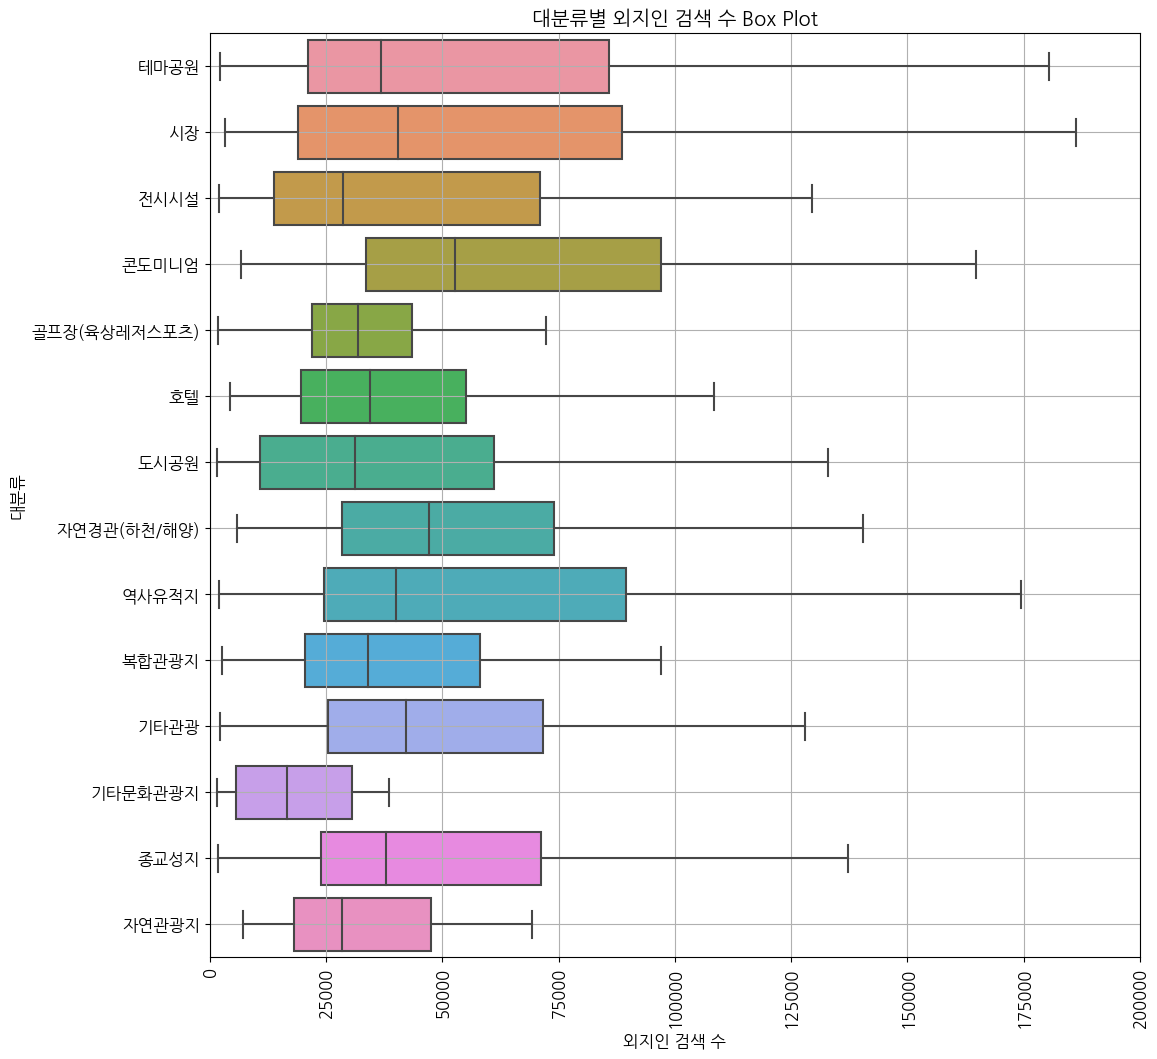

In [11]:
# 대분류별로 박스플롯 그리기(공연시설 제외)
sorted_data = tour_result.sort_values(by = '외지인 검색 수', ascending = False)
categories = sorted_data['대분류'].unique()

# 그래프 크기 설정
plt.figure(figsize=(12, 12))

# 대분류별로 박스플롯 그리기
sns.boxplot(data=sorted_data[sorted_data['대분류'].isin(categories)], x='외지인 검색 수', y='대분류', showfliers=False)
plt.xticks(rotation=90)
plt.xlabel('외지인 검색 수')
plt.ylabel('대분류')
plt.title('대분류별 외지인 검색 수 Box Plot')
plt.xlim(0,200000)
plt.grid()
plt.show()

## 3-2) 관광유형 분석 

### T-Test

### 관광 유형별로 t검정

In [12]:
# 관광 유형별로 t검정

# 관광 유형 개수 세기 - 가장 적은 유형이 29개
t_category = []
not_category = []
category = tour_result['대분류'].unique()
for i in category:
    print(f'{i} 유형 개수 : {len(tour_result.loc[tour_result["대분류"]==i])}')
    if len(tour_result.loc[tour_result["대분류"]==i]) > 25:
        t_category.append(i)
    else:
        not_category.append(i)
        not_category.append(len(tour_result.loc[tour_result["대분류"]==i]))

시장 유형 개수 : 113
콘도미니엄 유형 개수 : 64
호텔 유형 개수 : 143
자연경관(하천/해양) 유형 개수 : 117
테마공원 유형 개수 : 60
골프장(육상레저스포츠) 유형 개수 : 139
기타문화관광지 유형 개수 : 29
종교성지 유형 개수 : 56
기타관광 유형 개수 : 73
복합관광지 유형 개수 : 65
역사유적지 유형 개수 : 41
자연관광지 유형 개수 : 43
전시시설 유형 개수 : 74
도시공원 유형 개수 : 85


In [13]:
# 정규성 검정
n_list = []
t_list = []
for i in category:
    #print(i)
    result = stats.shapiro(tour_result.loc[tour_result['대분류']== i, '외지인 검색 수'])
    if result.pvalue < 0.05: # 유의수준 0.05 # 귀무가설 : 정규분포를 따른다. 대립가설 : 정규분포를 따르지 않는다.
        #print(f'{i}는 정규분포를 따르지 않습니다.')
        t_list.append(i)
    else:
        #print(f'{i}는 정규분포를 따릅니다.')
        n_list.append(i)
    #print()

print(f'정규분포를 따르는 관광 유형 : {n_list}', '\n',len(n_list), '개')
print(f'정규분포를 따르지 않는 관광 유형 : {t_list}', '\n', len(t_list), '개')

정규분포를 따르는 관광 유형 : [] 
 0 개
정규분포를 따르지 않는 관광 유형 : ['시장', '콘도미니엄', '호텔', '자연경관(하천/해양)', '테마공원', '골프장(육상레저스포츠)', '기타문화관광지', '종교성지', '기타관광', '복합관광지', '역사유적지', '자연관광지', '전시시설', '도시공원'] 
 14 개


### 양측검정

In [14]:
from scipy import stats

for i in t_category:
    print(f'<{i}>')
    group1 = tour_result.loc[tour_result["대분류"]==i, '외지인 검색 수']
    for j in t_category:
        group2 = tour_result.loc[tour_result["대분류"]==j, '외지인 검색 수']
        # 등분산 검정
        statistic, p_value = stats.levene(group1, group2)
        
        # 유의수준 0.05로 검정
        if p_value < 0.05:
#             print("두 집단은 이분산을 가정할 수 있습니다.")
            t_stat, p_value_t = stats.ttest_ind(group1, group2, equal_var=False, alternative='two-sided')
        else:
#             print("두 집단은 등분산을 가정할 수 있습니다.")
            t_stat, p_value_t = stats.ttest_ind(group1, group2, equal_var=True, alternative='two-sided')
        
        if p_value_t < 0.05:
            print(f'{i} != {j}')
#         else:
#             print(f'{i} == {j}')
    print('-----------------------------------------------')

<시장>
시장 != 호텔
시장 != 골프장(육상레저스포츠)
시장 != 기타문화관광지
시장 != 기타관광
시장 != 복합관광지
시장 != 자연관광지
-----------------------------------------------
<콘도미니엄>
콘도미니엄 != 호텔
콘도미니엄 != 골프장(육상레저스포츠)
콘도미니엄 != 기타문화관광지
콘도미니엄 != 종교성지
콘도미니엄 != 기타관광
콘도미니엄 != 복합관광지
콘도미니엄 != 자연관광지
콘도미니엄 != 도시공원
-----------------------------------------------
<호텔>
호텔 != 시장
호텔 != 콘도미니엄
호텔 != 자연경관(하천/해양)
호텔 != 기타문화관광지
-----------------------------------------------
<자연경관(하천/해양)>
자연경관(하천/해양) != 호텔
자연경관(하천/해양) != 골프장(육상레저스포츠)
자연경관(하천/해양) != 기타문화관광지
자연경관(하천/해양) != 자연관광지
-----------------------------------------------
<테마공원>
테마공원 != 기타문화관광지
테마공원 != 자연관광지
-----------------------------------------------
<골프장(육상레저스포츠)>
골프장(육상레저스포츠) != 시장
골프장(육상레저스포츠) != 콘도미니엄
골프장(육상레저스포츠) != 자연경관(하천/해양)
골프장(육상레저스포츠) != 기타문화관광지
골프장(육상레저스포츠) != 역사유적지
-----------------------------------------------
<기타문화관광지>
기타문화관광지 != 시장
기타문화관광지 != 콘도미니엄
기타문화관광지 != 호텔
기타문화관광지 != 자연경관(하천/해양)
기타문화관광지 != 테마공원
기타문화관광지 != 골프장(육상레저스포츠)
기타문화관광지 != 종교성지
기타문화관광지 != 기타관광
기타문화관광지 != 복합관광지
기타문

### 단측검정

In [15]:
# greater
from scipy import stats

for i in t_category:
    print(f'<{i}>')
    group1 = tour_result.loc[tour_result["대분류"]==i, '외지인 검색 수']
    for j in t_category:
        group2 = tour_result.loc[tour_result["대분류"]==j, '외지인 검색 수']
        # 등분산 검정
        statistic, p_value = stats.levene(group1, group2)
        
        # 유의수준 0.05로 검정
        if p_value < 0.05:
#             print("두 집단은 이분산을 가정할 수 있습니다.")
            t_stat, p_value_t = stats.ttest_ind(group1, group2, equal_var=False, alternative='greater')
        else:
#             print("두 집단은 등분산을 가정할 수 있습니다.")
            t_stat, p_value_t = stats.ttest_ind(group1, group2, equal_var=True, alternative='greater')
        
        if p_value_t < 0.05:
            print(f'{i} >> {j}')
#         else:
#             print(f'{i} == {j}')
    print('-----------------------------------------------')

<시장>
시장 >> 호텔
시장 >> 골프장(육상레저스포츠)
시장 >> 기타문화관광지
시장 >> 기타관광
시장 >> 복합관광지
시장 >> 자연관광지
시장 >> 도시공원
-----------------------------------------------
<콘도미니엄>
콘도미니엄 >> 호텔
콘도미니엄 >> 자연경관(하천/해양)
콘도미니엄 >> 골프장(육상레저스포츠)
콘도미니엄 >> 기타문화관광지
콘도미니엄 >> 종교성지
콘도미니엄 >> 기타관광
콘도미니엄 >> 복합관광지
콘도미니엄 >> 자연관광지
콘도미니엄 >> 도시공원
-----------------------------------------------
<호텔>
호텔 >> 기타문화관광지
-----------------------------------------------
<자연경관(하천/해양)>
자연경관(하천/해양) >> 호텔
자연경관(하천/해양) >> 골프장(육상레저스포츠)
자연경관(하천/해양) >> 기타문화관광지
자연경관(하천/해양) >> 복합관광지
자연경관(하천/해양) >> 자연관광지
-----------------------------------------------
<테마공원>
테마공원 >> 골프장(육상레저스포츠)
테마공원 >> 기타문화관광지
테마공원 >> 자연관광지
-----------------------------------------------
<골프장(육상레저스포츠)>
골프장(육상레저스포츠) >> 기타문화관광지
-----------------------------------------------
<기타문화관광지>
-----------------------------------------------
<종교성지>
종교성지 >> 기타문화관광지
종교성지 >> 자연관광지
-----------------------------------------------
<기타관광>
기타관광 >> 기타문화관광지
기타관광 >> 자연관광지
----------------------------------------------

In [16]:
# less
from scipy import stats

for i in t_category:
    print(f'<{i}>')
    group1 = tour_result.loc[tour_result["대분류"]==i, '외지인 검색 수']
    for j in t_category:
        group2 = tour_result.loc[tour_result["대분류"]==j, '외지인 검색 수']
        # 등분산 검정
        statistic, p_value = stats.levene(group1, group2)
        
        # 유의수준 0.05로 검정
        if p_value < 0.05:
#             print("두 집단은 이분산을 가정할 수 있습니다.")
            t_stat, p_value_t = stats.ttest_ind(group1, group2, equal_var=False, alternative='less')
        else:
#             print("두 집단은 등분산을 가정할 수 있습니다.")
            t_stat, p_value_t = stats.ttest_ind(group1, group2, equal_var=True, alternative='less')
        
        if p_value_t < 0.05:
            print(f'{i} << {j}')
#         else:
#             print(f'{i} ?? {j}')
    print('-----------------------------------------------')

<시장>
-----------------------------------------------
<콘도미니엄>
-----------------------------------------------
<호텔>
호텔 << 시장
호텔 << 콘도미니엄
호텔 << 자연경관(하천/해양)
-----------------------------------------------
<자연경관(하천/해양)>
자연경관(하천/해양) << 콘도미니엄
-----------------------------------------------
<테마공원>
-----------------------------------------------
<골프장(육상레저스포츠)>
골프장(육상레저스포츠) << 시장
골프장(육상레저스포츠) << 콘도미니엄
골프장(육상레저스포츠) << 자연경관(하천/해양)
골프장(육상레저스포츠) << 테마공원
골프장(육상레저스포츠) << 역사유적지
-----------------------------------------------
<기타문화관광지>
기타문화관광지 << 시장
기타문화관광지 << 콘도미니엄
기타문화관광지 << 호텔
기타문화관광지 << 자연경관(하천/해양)
기타문화관광지 << 테마공원
기타문화관광지 << 골프장(육상레저스포츠)
기타문화관광지 << 종교성지
기타문화관광지 << 기타관광
기타문화관광지 << 복합관광지
기타문화관광지 << 역사유적지
기타문화관광지 << 전시시설
기타문화관광지 << 도시공원
-----------------------------------------------
<종교성지>
종교성지 << 콘도미니엄
-----------------------------------------------
<기타관광>
기타관광 << 시장
기타관광 << 콘도미니엄
-----------------------------------------------
<복합관광지>
복합관광지 << 시장
복합관광지 << 콘도미니엄
복합관광지 << 자연경관(하천/해양)
-----------------

### 관광지 유형 유무로 t-test

In [17]:
# less
from scipy import stats

for i in t_category:
    print(f'<{i}>')
    group1 = tour_result.loc[tour_result["대분류"]==i, '외지인 검색 수']
    group2 = tour_result.loc[tour_result["대분류"]!=i, '외지인 검색 수']
    
    # 등분산 검정
    statistic, p_value = stats.levene(group1, group2)

    # 유의수준 0.05로 검정
    if p_value < 0.05:
#             print("두 집단은 이분산을 가정할 수 있습니다.")
        t_stat, p_value_t = stats.ttest_ind(group1, group2, equal_var=False, alternative='less')
    else:
#             print("두 집단은 등분산을 가정할 수 있습니다.")
        t_stat, p_value_t = stats.ttest_ind(group1, group2, equal_var=True, alternative='less')

    if p_value_t < 0.05:
        print(f'{i} 있는 관광지 << {i} 없는 관광지')
#     else:
#             print(f'{i} 있는 관광지 ?= {i} 없는 관광지')
    print('-----------------------------------------------')

<시장>
-----------------------------------------------
<콘도미니엄>
-----------------------------------------------
<호텔>
-----------------------------------------------
<자연경관(하천/해양)>
-----------------------------------------------
<테마공원>
-----------------------------------------------
<골프장(육상레저스포츠)>
골프장(육상레저스포츠) 있는 관광지 << 골프장(육상레저스포츠) 없는 관광지
-----------------------------------------------
<기타문화관광지>
기타문화관광지 있는 관광지 << 기타문화관광지 없는 관광지
-----------------------------------------------
<종교성지>
-----------------------------------------------
<기타관광>
-----------------------------------------------
<복합관광지>
-----------------------------------------------
<역사유적지>
-----------------------------------------------
<자연관광지>
자연관광지 있는 관광지 << 자연관광지 없는 관광지
-----------------------------------------------
<전시시설>
-----------------------------------------------
<도시공원>
-----------------------------------------------


## 3-3) 관광지 수 분석

### t-test

In [18]:
# 표본 수가 30이상이 되도록 설정
# 1) 1개/2개/3-4개 => 1개 = 2개
# 2) 2개/3-4개/5-7개/8~18개 => <<<
group1 = general_tour_popu.loc[(general_tour_popu['관광지 수'] >= 1) & (general_tour_popu['관광지 수'] <= 1), '외지인 검색 수']
group2 = general_tour_popu.loc[(general_tour_popu['관광지 수'] >= 2) & (general_tour_popu['관광지 수'] <= 2), '외지인 검색 수']
group3 = general_tour_popu.loc[(general_tour_popu['관광지 수'] >= 3) & (general_tour_popu['관광지 수'] <= 4), '외지인 검색 수']
group4 = general_tour_popu.loc[(general_tour_popu['관광지 수'] >= 5) & (general_tour_popu['관광지 수'] <= 8), '외지인 검색 수']
group5 = general_tour_popu.loc[(general_tour_popu['관광지 수'] >= 9), '외지인 검색 수']


print(f'group1의 행 개수 : {len(group1)}\ngroup2의 행 개수 : {len(group2)}\ngroup3의 행 개수 : {len(group3)}')
print(f'group4의 행 개수 : {len(group4)}\ngroup5의 행 개수 : {len(group5)}')
# 등분산/이분산 검정
def equal_var(group1, group2):
    statistic, p_value = stats.levene(group1, group2)
    if p_value < 0.05:
        print('이분산')
    else:
        print('등분산')

equal_var(group1,group2)
equal_var(group2,group3)
equal_var(group3,group4)
equal_var(group4,group5)

group1의 행 개수 : 35
group2의 행 개수 : 32
group3의 행 개수 : 42
group4의 행 개수 : 40
group5의 행 개수 : 34
등분산
등분산
등분산
이분산


In [19]:
# 관광지 수에 따른 t검정
# group1, group2
t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=True, alternative='less')
if p_value < 0.05:
    print('group1의 외지인 검색 수가 group2의 외지인 검색 수보다 작다.')
else:
    print('@@group1과 group2의 외지인 검색 수는 유의미한 차이가 없다')

# group2, group3
t_stat, p_value = stats.ttest_ind(group2, group3, equal_var=True, alternative='less')
if p_value < 0.05:
    print('group2의 외지인 검색 수가 group3의 외지인 검색 수보다 작다.')
else:
    print('@@group1과 group3의 외지인 검색 수는 유의미한 차이가 없다')
    
# group3, group4
t_stat, p_value = stats.ttest_ind(group3, group4, equal_var=True, alternative='less')
if p_value < 0.05:
    print('group3의 외지인 검색 수가 group4의 외지인 검색 수보다 작다.')
else:
    print('@@group2과 group3의 외지인 검색 수는 유의미한 차이가 없다')

# group4, group5
t_stat, p_value = stats.ttest_ind(group4, group5, equal_var=False, alternative='less')
if p_value < 0.05:
    print('group4의 외지인 검색 수가 group5의 외지인 검색 수보다 작다.')
else:
    print('@@group2과 group3의 외지인 검색 수는 유의미한 차이가 없다')

@@group1과 group2의 외지인 검색 수는 유의미한 차이가 없다
group2의 외지인 검색 수가 group3의 외지인 검색 수보다 작다.
group3의 외지인 검색 수가 group4의 외지인 검색 수보다 작다.
group4의 외지인 검색 수가 group5의 외지인 검색 수보다 작다.


## 3-3) 관광지 수 분석

### BoxPlot

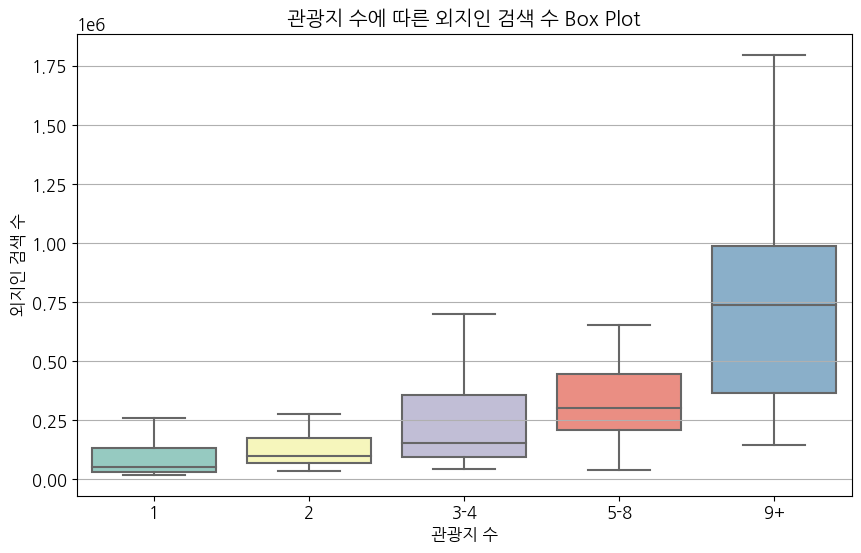

In [20]:
# 관광지 수 group별로 박스플롯 그리기

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 5개 그룹의 데이터로 박스플롯 그리기
sns.boxplot(data=[group1, group2, group3, group4, group5], 
            showfliers=False,  # 이상치 제외
            notch=False,        # 신뢰구간 표시
            palette='Set3')

# 그래프 설정
plt.xlabel('관광지 수')
plt.ylabel('외지인 검색 수')
plt.title('관광지 수에 따른 외지인 검색 수 Box Plot')
plt.xticks([0, 1, 2, 3, 4], ['1', '2', '3-4', '5-8', '9+'])
plt.grid(axis='y')

# 그래프 출력
plt.show()
